In [1]:
# Importando nossas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Código em python para calcular o ajuste linear simples entre duas variáveis para a disciplina MEC2 na física da Uerj**

In [2]:
# Lendo nosso arquivo excel
dados = pd.read_excel("Ajuste2.xlsx")
# Aprensentando os dados na tela, no caso o head() apresenta os 5 primeiros itens
dados.head()


,X,Y,T,L
0,0.102337,1.003820,2.01,1.0
1,0.091442,0.903438,1.90,0.9
2,0.081161,0.803056,1.79,0.8
3,0.071492,0.702674,1.68,0.7
4,0.060856,0.602292,1.55,0.6


In [3]:
# Aqui estamos criando um array com os valores de X e igualmente para Y
x = dados["X"].values
y = dados["Y"].values
print("x:",x, "y:", y)


x: [0.10233693 0.09144237 0.0811608  0.07149223 0.06085604] y: [1.00381984 0.90343785 0.80305587 0.70267389 0.6022919 ]


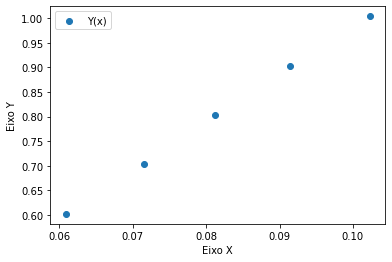

In [4]:
# Criando gráfico de dispersão simples
plt.scatter(x,y,label="Y(x)");
plt.xlabel("Eixo X");
plt.ylabel("Eixo Y");
plt.legend();
plt.plot();

**<h3>Vamos calcular nosso ajuste com as relações abaixo, e depois iremos plotar a reta ao gráfico que criamos acima</h3>**

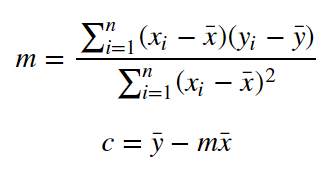
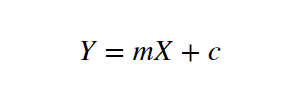

**Calculando a reta do ajuste linear simples e o plot para plotar o gráfico**

(9.750696259815797, array([1.00664316, 0.90041361, 0.80016117, 0.70588584, 0.60217557]), 0.008786850427877413)


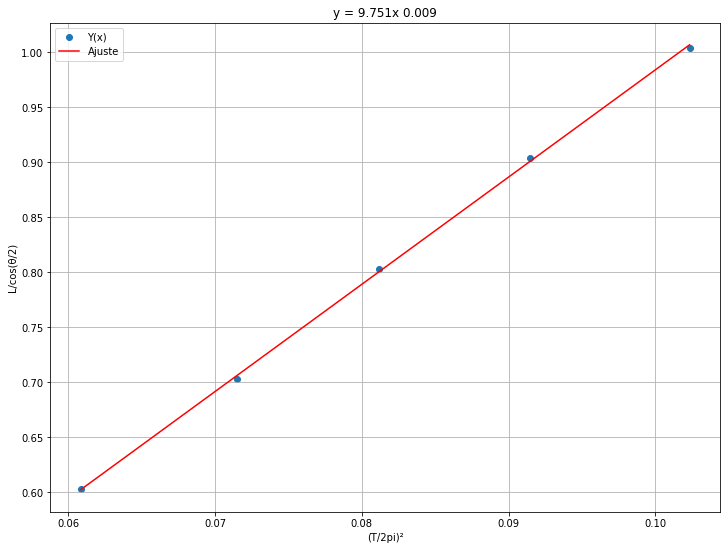

In [5]:
#Para calcular M iremos precisar da média de x e y e criar uma equação para multiplicar os erros de x e y e o erro quadratico de x no denominador
def ajuste(x,y):
  N = len(x)
  x_media = np.mean(x)
  y_media= np.mean(y)
  erro_x = (x - x_media)
  erro_y = (y - y_media)
  erro_quadratico_x = np.sum(erro_x**2)
  m = np.sum((erro_x*erro_y))/erro_quadratico_x
  c = y_media - m*x_media
  # p = np.cov(x,y)[1][0]/np.std(x, ddof =1)*np.std(y,ddof=1)
  r = (np.dot(x, y) - N * x_media * y_media) / ((N - 1) * np.std(x, ddof =1) * np.std(y,ddof=1))
  reta = m * x + c  
  return m,reta,c

def plot_reta(x,y):
    plt.figure(figsize=(12,9))
    m, reta, c = ajuste(x,y)
    plt.scatter(x,y,label="Y(x)");
    plt.grid()
    plt.title(f"y = {m:.3f}x {c:.3f}")
    plt.plot(x,reta,label="Ajuste", color="red")
    plt.xlabel("(T/2pi)²");
    plt.ylabel("L/cos(θ/2)");
    plt.savefig("ajuste2.png")
    plt.legend();
    plt.plot();

print(ajuste(x,y))
plot_reta(x,y)

In [6]:
# Criando um arquivo de texto para salvar os dados
arquivo=open("resultadoVelocidade.txt","w")
for i in ajuste(x,y):
  print(i)
  arquivo.write(str(i))

9.750696259815797
[1.00664316 0.90041361 0.80016117 0.70588584 0.60217557]
0.008786850427877413


**Calculando as incertezas do ajuste**

(0.9998222115553882, 0.0038636485279017153, 0.10616947730771212, 0.008785320558594096)


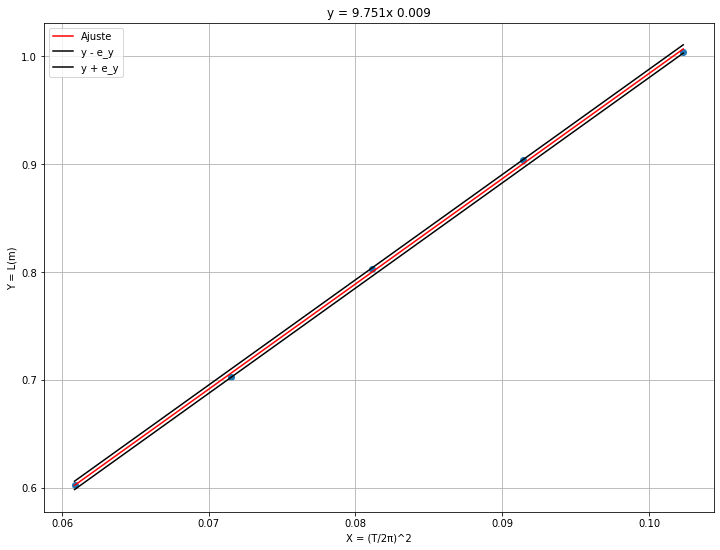

In [7]:
def incertezas(x,y):
    N = len(x)
    x_media = np.mean(x)
    y_media = np.mean(y)
    sigma_x = np.std(x, ddof=1)
    sigma_y = np.std(y, ddof=1)
    r = (np.dot(x, y) - N * x_media * y_media) / ((N - 1) * np.std(x, ddof =1) * np.std(y,ddof=1))
    e_y =  sigma_y * np.sqrt((N * (1 - r * r)) / (N - 2))
    sigma_a = (1/sigma_x) * (e_y/np.sqrt(N))
    rms = np.sqrt(np.sum(x**2)/N)
    sigma_b = sigma_a * rms
    return (r, e_y, sigma_a , sigma_b)

print(incertezas(x,y))

def plot_reta(x,y):
    plt.figure(figsize=(12,9))
    m, reta, c = ajuste(x,y)
    r, e_y, sigma_a, sigma_b = incertezas(x,y)
    plt.scatter(x,y)
    plt.grid(True)
    plt.title(f"y = {m:.3f}x {c:.3f}")
    plt.plot(x,reta,label="Ajuste", color="red")
    plt.plot(x,reta - e_y, label="y - e_y", color="black")
    plt.plot(x,reta + e_y, label="y + e_y", color="black")
    plt.xlabel("X = (T/2π)^2");
    plt.ylabel("Y = L(m)");
    plt.legend();
    plt.savefig("ajuste2.png")
    plt.plot();

plot_reta(x,y)